In [14]:
import pandas as pd
import numpy as np
import pathlib as pl


from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from statsmodels.stats.multitest import multipletests

from scipy.stats import mannwhitneyu, fisher_exact, pearsonr, kruskal

In [2]:
import sys
import os
sys.path.append("../../FinalCode/")
import download.download as dwnl
import utils.plotting as plting
import adVMP.adVMP_discovery as discov
import adVMP.adVMP_plots as advmpplt

In [3]:
# For figures
colors = sns.color_palette("muted")
fig_dir = pl.Path("/Users/josephineyates/Documents/CRC_polyp/ArticleFigures/unit")

In [4]:
base_dir = pl.Path("/Users/josephineyates/Documents/CRC_polyp/sesame_processed_EPIC/")
base_dir4 = pl.Path("/Users/josephineyates/Documents/CRC_polyp/sesame_processed_EPIC4/")

data_dir = pl.Path("/Users/josephineyates/Documents/CRC_polyp/FinalData/")

bad_probes = pd.read_csv(data_dir / "auxiliary" / "sketchy_probe_list_epic.csv",index_col=0).values.ravel()
sample_origin_path = pl.Path(data_dir / "clinical" / "sample_origin_wbatch.csv")

clinical_path = pl.Path(data_dir / "clinical" / "cleaned_clinical_reduced_diet.csv")
target_path = pl.Path(data_dir / "clinical" / "targets.csv")

In [5]:
EPIC2_b, EPIC2_clin, EPIC2_samples, EPIC2_phenotypes, EPIC3_b, EPIC3_clin, EPIC3_samples, EPIC3_phenotypes = dwnl.download_EPIC(sample_origin_path=sample_origin_path, 
                     base_dir=base_dir, clinical_path=clinical_path, target_path=target_path,
                  bad_probes=bad_probes, EPIC4=False) 

30it [00:03,  8.14it/s]


In [6]:
EPIC4_b, EPIC4_clin, EPIC4_samples, EPIC4_phenotypes = dwnl.download_EPIC(sample_origin_path=sample_origin_path, 
                     base_dir=base_dir4, clinical_path=clinical_path, target_path=target_path, 
                  bad_probes=bad_probes, EPIC4=True) 

18it [00:03,  5.17it/s]


In [7]:
union_cpgs = pd.read_csv("/Users/josephineyates/Documents/CRC_polyp/FinalData/adVMP/union_cpgs.csv", index_col=0).values.ravel()

# Link adVMPs with clinical and lifestyle

In [8]:
import statsmodels.api as sm

In [9]:
cols_clin = ["Age at visit",
            "BMI",
            "Metabolic syndrome",
            "Analgesic >=2 years (overall)",
            "Ever smoked cigarettes",
            "Pack years",
            'inflammatory_n',
            'anti-inflammatory_n', 
            'western_n', 
            'prudent_n'
            ]

In [10]:
from typing import List, Optional
def get_dmps(EPIC_b: pd.DataFrame, union_cpgs: np.ndarray, std_clin: pd.DataFrame) -> List:
    all_results = {charac: [] for charac in std_clin.columns}

    for cg in tqdm(union_cpgs):
        exog_df = sm.add_constant(std_clin)
        endog = EPIC_b[cg].ravel()
        # Instantiate a bin family model with the default link function.
        bin_model = sm.GLM(endog, exog_df, family=sm.families.Gamma())

        bin_results = bin_model.fit()
        df = bin_results.summary2().tables[1]
        for charac in all_results:
            all_results[charac].append(df.loc[charac])
            
    for charac in all_results:
        df = pd.concat(all_results[charac],axis=1).T
        df.index = union_cpgs
        df["FDR q"] = multipletests(df["P>|z|"], method="fdr_bh")[1]
        all_results[charac] = df
    return all_results

In [11]:
res_dir = pl.Path("/Users/josephineyates/Documents/CRC_polyp/FinalData/adVMP_link_clinical")

# SWEPIC1

In [147]:
std_clin2 = EPIC2_clin[cols_clin]
std_clin2 = (std_clin2 - std_clin2.mean())/std_clin2.std()
std_clin2 = std_clin2.dropna()

In [148]:
all_results = get_dmps(EPIC_b=EPIC2_b.loc[std_clin2.index], union_cpgs=union_cpgs, std_clin=std_clin2)

  0%|          | 0/268 [00:00<?, ?it/s]

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

In [149]:
for charac in all_results:
    os.makedirs(res_dir / "SWEPIC1", exist_ok=True)
    all_results[charac].to_csv(res_dir / "SWEPIC1" / f"{charac}_link.csv")

# SWEPIC2

In [150]:
std_clin3 = EPIC3_clin[cols_clin]
std_clin3 = (std_clin3 - std_clin3.mean())/std_clin3.std()
std_clin3 = std_clin3.dropna()

In [151]:
all_results = get_dmps(EPIC_b=EPIC3_b.loc[std_clin3.index], union_cpgs=union_cpgs, std_clin=std_clin3)

  0%|          | 0/268 [00:00<?, ?it/s]

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

In [152]:
for charac in all_results:
    os.makedirs(res_dir / "SWEPIC2", exist_ok=True)
    all_results[charac].to_csv(res_dir / "SWEPIC2" / f"{charac}_link.csv")

# SWEPIC3

In [153]:
std_clin4 = EPIC4_clin[cols_clin]
std_clin4 = (std_clin4 - std_clin4.mean())/std_clin4.std()
std_clin4 = std_clin4.dropna()

In [154]:
all_results = get_dmps(EPIC_b=EPIC4_b.loc[std_clin4.index], union_cpgs=union_cpgs, std_clin=std_clin4)

  0%|          | 0/268 [00:00<?, ?it/s]

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/statsmodels/genmod/generaliz

In [155]:
for charac in all_results:
    os.makedirs(res_dir / "SWEPIC3", exist_ok=True)
    all_results[charac].to_csv(res_dir / "SWEPIC3" / f"{charac}_link.csv")

# Compare all SWEPIC

In [12]:
all_results = {"SWEPIC1": {}, "SWEPIC2": {}, "SWEPIC3": {}}
for cohort in all_results:
    for charac in cols_clin:
        all_results[cohort][charac] = pd.read_csv(res_dir / cohort / f"{charac}_link.csv", index_col=0)

In [19]:
pltte = sns.color_palette("husl", 10)

In [21]:
from typing import Dict
def get_hist_plot_df(cols_clin: np.ndarray, union_cpgs: np.ndarray, all_results: Dict, lim_sum: int=0) -> Dict:
    hist_plot_df = {}
    for charac in cols_clin:

        charac_df = pd.concat([all_results["SWEPIC1"][charac]["FDR q"],
                   all_results["SWEPIC2"][charac]["FDR q"],
                   all_results["SWEPIC3"][charac]["FDR q"]],axis=1)

        charac_df.columns = ["SWEPIC1","SWEPIC2","SWEPIC3"]
        hist_plot_df[charac] = [((charac_df<0.1).sum(axis=1)>lim_sum).sum()]

    hist_plot_df = pd.DataFrame.from_dict(hist_plot_df)/len(union_cpgs)
    hist_plot_df.index = ["Proportion"]
    hist_plot_df = hist_plot_df.applymap(lambda x: x*100)
    hist_plot_df = hist_plot_df.sort_values(by="Proportion",ascending=False,axis=1)
    return hist_plot_df

In [22]:
hist_plot_df1 = get_hist_plot_df(cols_clin=cols_clin, union_cpgs=union_cpgs, all_results=all_results)
hist_plot_df2 = get_hist_plot_df(cols_clin=cols_clin, union_cpgs=union_cpgs, all_results=all_results, lim_sum=1)

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)
/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_17373/44079693.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','20','40','60','80','100'])


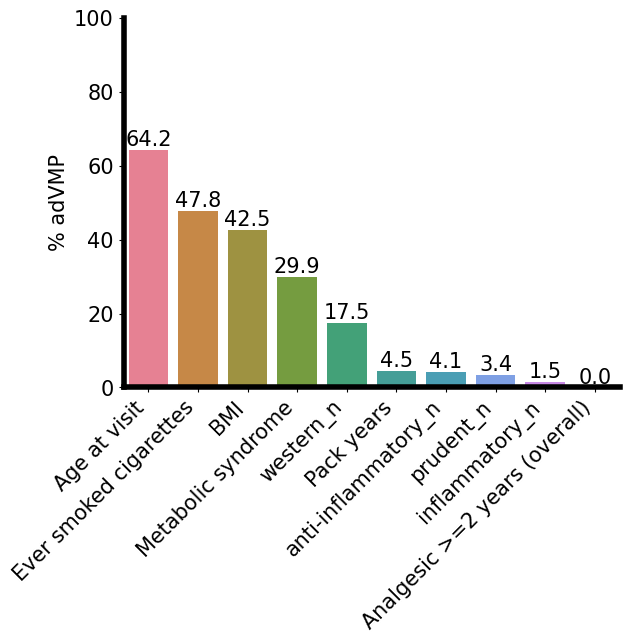

In [23]:
ax = sns.barplot(data=hist_plot_df1, palette=pltte)
plting.transform_plot_ax(ax, legend_title="")
ax.set_ylim([None, 100])
ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_ylabel("% adVMP")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   verticalalignment="top",horizontalalignment="right")
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=15)
ax.figure.savefig(fig_dir / "barplot_link_clinical_lifestyle_adVMP_1ds.svg", bbox_inches="tight")

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)
/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_17373/4037131899.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','10','20','30','40','50'])


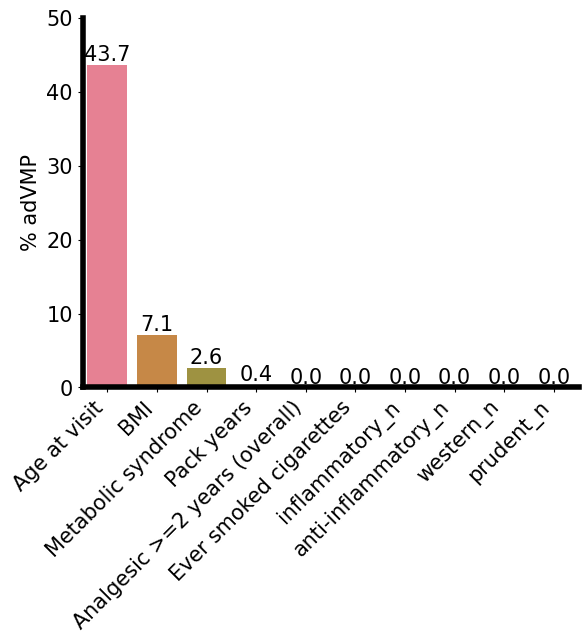

In [24]:
ax = sns.barplot(data=hist_plot_df2, palette=pltte)
plting.transform_plot_ax(ax, legend_title="")
ax.set_ylim([None, 50])
ax.set_yticklabels(['0','10','20','30','40','50'])
ax.set_ylabel("% adVMP")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   verticalalignment="top",horizontalalignment="right")
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=15)
ax.figure.savefig(fig_dir / "barplot_link_clinical_lifestyle_adVMP_2ds.svg", bbox_inches="tight")

In [25]:
def get_heatmap_df(all_results_swepic: pd.DataFrame) -> pd.DataFrame:
    df = []
    for charac in all_results_swepic:
        df.append(all_results_swepic[charac]["FDR q"])
    df = pd.concat(df,axis=1)
    df.columns = list(all_results_swepic.keys())
    df = -df.applymap(np.log10)
    return df

def get_heatmap_sign_probes(heatmap_df: pd.DataFrame, ax: plt.Axes, cbar: bool=False) -> None:
    sns.heatmap(heatmap_df, 
                mask=heatmap_df<-np.log10(0.1), 
                vmax=5, 
                cmap="vlag", 
                center=0, 
                linewidths=0.2,ax=ax,
                cbar=cbar)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
                       verticalalignment="top",horizontalalignment="right")

In [26]:
all_results_swepic1 = all_results["SWEPIC1"]

In [27]:
heatmap_df1 = get_heatmap_df(all_results_swepic=all_results_swepic1)

In [28]:
all_results_swepic2 = all_results["SWEPIC2"]

In [29]:
heatmap_df2 = get_heatmap_df(all_results_swepic=all_results_swepic2)

In [30]:
all_results_swepic3 = all_results["SWEPIC3"]

In [31]:
heatmap_df3 = get_heatmap_df(all_results_swepic=all_results_swepic3)

In [32]:
((heatmap_df1>-np.log10(0.1)).sum(axis=1)==0).sum(),((heatmap_df2>-np.log10(0.1)).sum(axis=1)==0).sum(),((heatmap_df3>-np.log10(0.1)).sum(axis=1)==0).sum()

(76, 110, 126)

In [33]:
heatmap_dfs = [heatmap_df1,heatmap_df2,heatmap_df3]

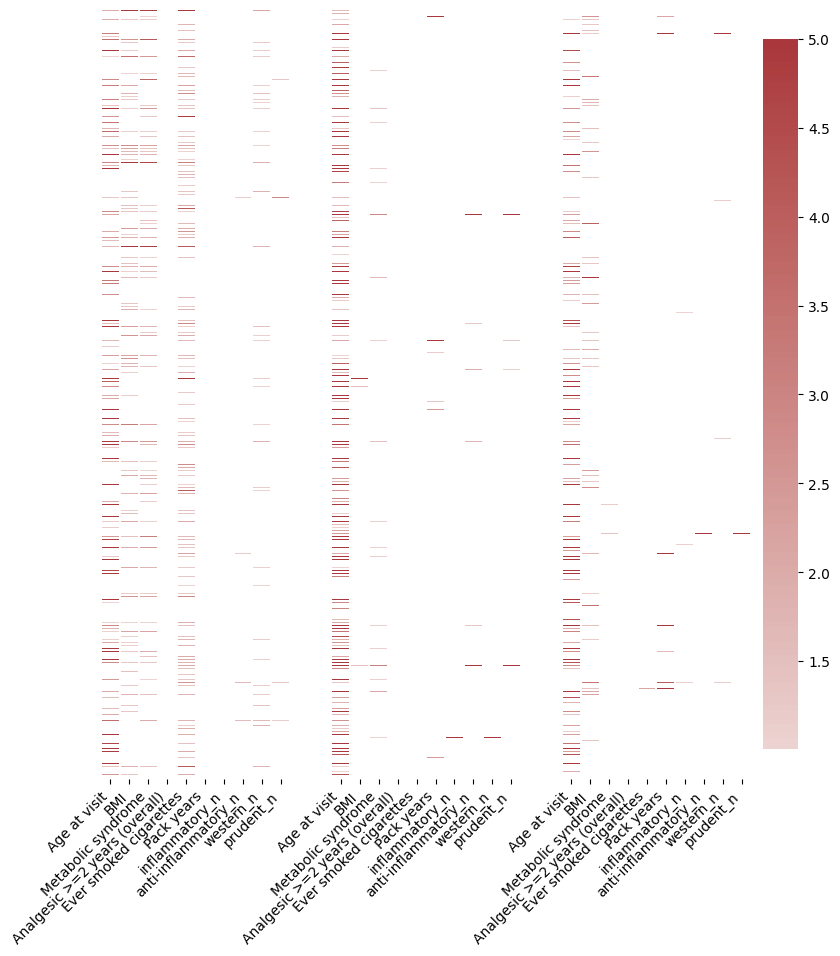

In [34]:
fig, ax = plt.subplots(1,3,figsize=(9,10), gridspec_kw={'width_ratios': [4, 4, 5]})
cbar_ind = [False if i<(len(ax)-1) else True for i in range(len(ax))]
for i in range(len(ax)):
    get_heatmap_sign_probes(heatmap_dfs[i], ax=ax[i], cbar=cbar_ind[i])
fig.savefig(fig_dir / "heatmap_link_clinical_lifestyle_adVMP.svg", bbox_inches="tight")

In [35]:
def get_heatmap_histogram(heatmap_df: pd.DataFrame, name: str) -> plt.Axes:
    data = (heatmap_df>-np.log10(0.1)).sum(axis=1).to_frame()
    ax = sns.histplot(data=data, bins=np.arange(11), legend=None)
    ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=15)
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines[["bottom", "left"]].set_linewidth(4)
    ax.set_xlabel("Number of parameters associated", fontsize=15)
    ax.set_ylabel("Number of adVMPs", fontsize=15)
    ax.set_xlim([0,10])
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.set_title(name,fontsize=15)
    return ax

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_17373/1761877793.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_17373/1761877793.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


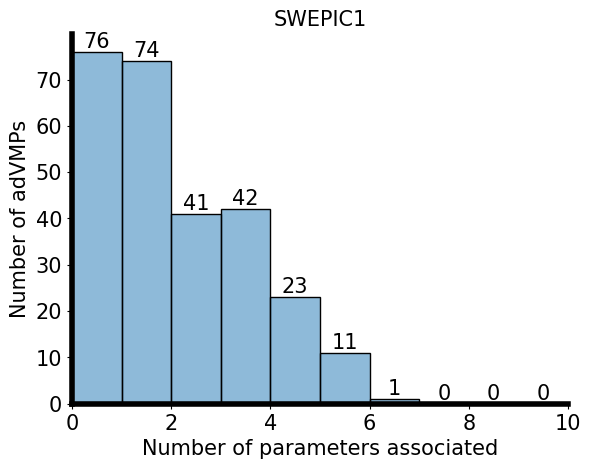

In [36]:
ax1 = get_heatmap_histogram(heatmap_df=heatmap_df1, name="SWEPIC1")
ax1.figure.savefig(fig_dir / "SWEPIC1_hist_clinlifestyle_assoc.svg", bbox_inches="tight")

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_17373/1761877793.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_17373/1761877793.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


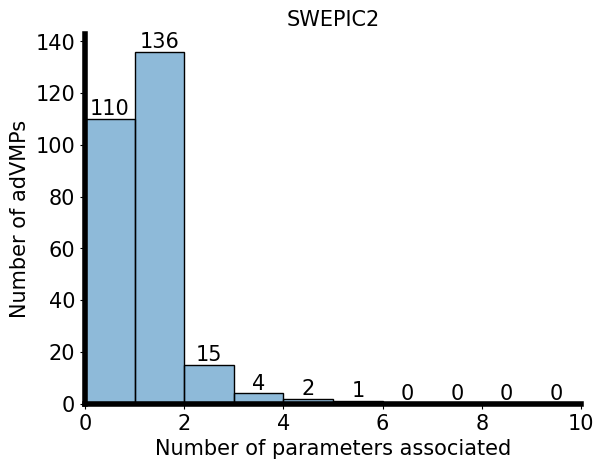

In [37]:
ax2 = get_heatmap_histogram(heatmap_df=heatmap_df2, name="SWEPIC2")
ax2.figure.savefig(fig_dir / "SWEPIC2_hist_clinlifestyle_assoc.svg", bbox_inches="tight")

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_17373/1761877793.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_17373/1761877793.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


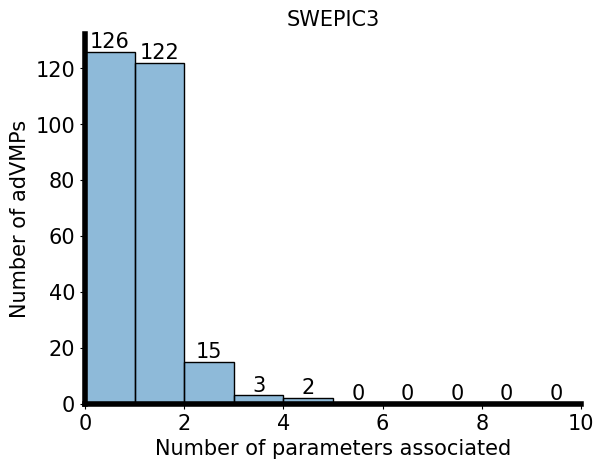

In [38]:
ax3 = get_heatmap_histogram(heatmap_df=heatmap_df3, name="SWEPIC3")
ax3.figure.savefig(fig_dir / "SWEPIC3_hist_clinlifestyle_assoc.svg", bbox_inches="tight")